##### 使用正規表達式 re
正規表達式 ( Regualr expression ) 也可稱為正則表達式或正規表示式，是一個非常強大且實用的字串處理方法，透過正規表達式，\
就能定義文字規則，接著就能從一段文字裡，找出符合規則的字元，幾乎常見的程式語言，都有支援正規表達式的操作，\
這篇教學將會介紹 Python 裡，專門操作正規表達式的標準函式庫 re。

##### 正規表達式語法參考 
正則表達式是一種輕量型的程式語言，不只是 Python 的一個套件，正規表達式使用的語法規則大同小異，可以參考下列幾個網站：
* 正規表示式 ( 維基百科 )
* 正規表達式 ( MDN Web Docs )
* 正規表示式 Regular Expression ( 陳鍾誠的網站 )

##### re 常用方法 
下方列出幾種 re 模組常用的方法 ( 參考 Python 官方文件：[re](https://docs.python.org/zh-tw/3/library/re.html) )：

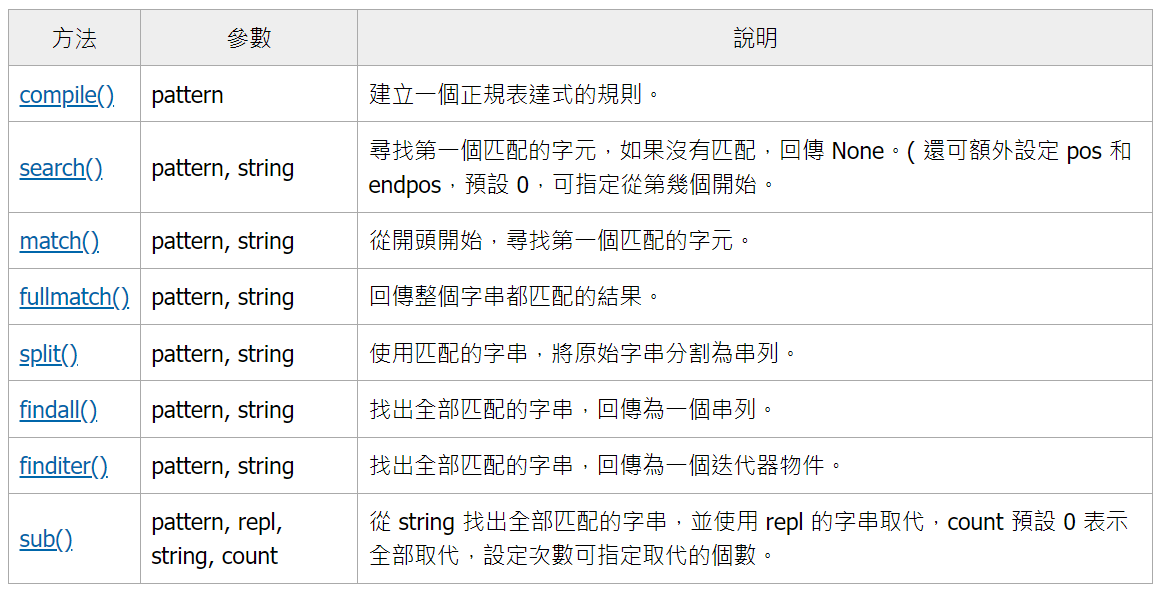

##### import re 
要使用 re 必須先 import re 模組，或使用 from 的方式，單獨 import 特定的類型。

In [ ]:
import re
from re import sample

##### compile(pattern) 
re.compile(pattern) 可以建立一個正規表達式的規則，規則建立後，就能使用 re 的其他方法執行套用這個規則的對象，舉例來說，\
下方的程式碼執行後，會建立找尋「連續三個數字」的規則，接著使用 search 的方法，就能找到 123 這三個字串\
( 下方會介紹跟 search 相關的方法 )。

* 配對的規則通常會用「r」進行標示，例如 r'str'。

In [ ]:
import re
role = re.compile(r'\d\d\d')       # 連續三個數字
result = role.search('abc123xyz')  # 使用 search 方法，使用建立的規則，搜尋 abc123xyz
print(result.group())              # 123

re.compile(pattern) 還有第二個參數 flags，預設不需要填寫，可以額外設定一些正規表達式的匹配方式，flags 有下列幾種參數可供設定：

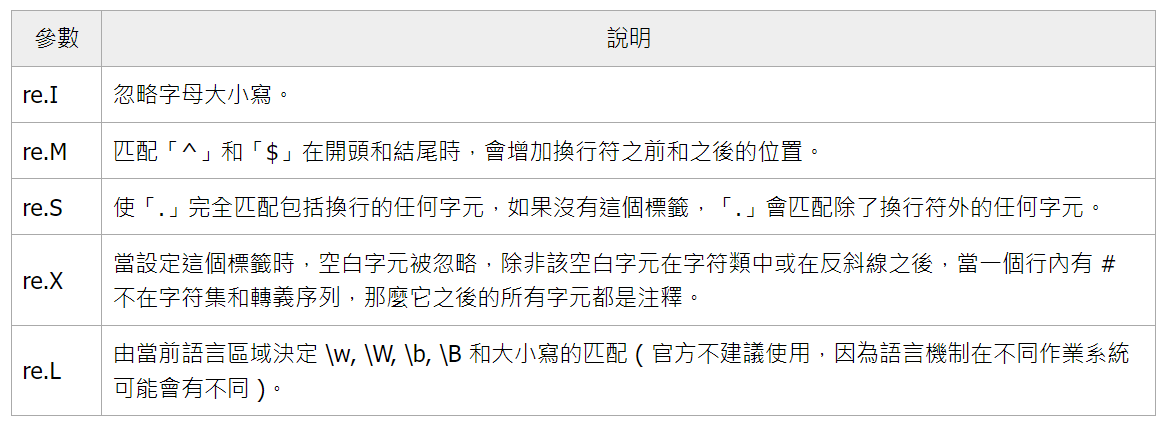

下方的程式碼執行後，會找出 HeLlo 這個字 ( 不論字母大小寫 )。

In [ ]:
import re
role = re.compile(r'hello', flags=re.I)  # 匹配 hello，不論大小寫
result = role.search('HeLlo World')
print(result.group())                    # HeLlo

使用 compile 後，包含 search，還有下列幾種常用方法可以使用 ( 用法等同 re 的其他相關方法 )：

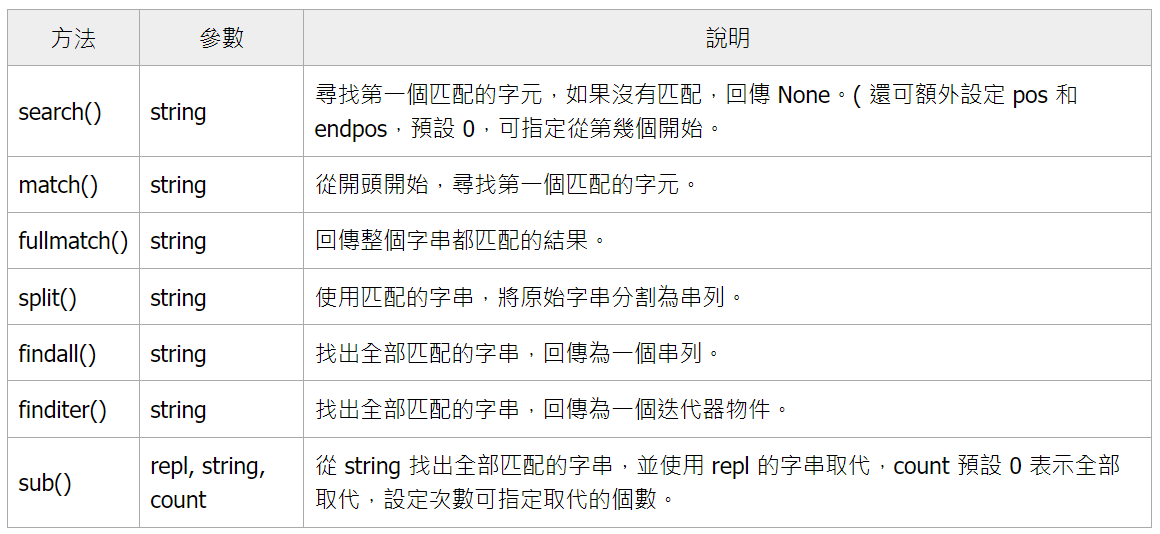

下方的程式碼執行後，會印出搜尋後匹配的結果。

In [ ]:
import re
role = re.compile(r'hello', flags=re.I)
result_search = role.search('HeLlo World, Hello oxxo')
result_match = role.match('HeLlo World, Hello oxxo')
result_fullmatch1 = role.fullmatch('HeLlo World, Hello oxxo')
result_fullmatch2 = role.fullmatch('HeLlo')
result_split = role.split('HeLlo World, Hello oxxo')
result_findall = role.findall('HeLlo World, Hello oxxo')
result_finditer = role.finditer('HeLlo World, Hello oxxo')
result_sub = role.sub('oxxo','HeLlo World, Hello oxxo')

print(result_search)          # <re.Match object; span=(0, 5), match='HeLlo'>
print(result_match)           # <re.Match object; span=(0, 5), match='HeLlo'>
print(result_fullmatch1)      # None
print(result_fullmatch2)      # <re.Match object; span=(0, 5), match='HeLlo'>
print(result_split)           # ['', ' World, ', ' oxxo']
print(result_findall)         # ['HeLlo', 'Hello']
print(list(result_finditer))  # [<re.Match object; span=(0, 5), match='HeLlo'>, <re.Match object; span=(13, 18), match='Hello'>]
print(result_sub)             # oxxo World, oxxo oxxo

進行正規表達式搜尋字串內容後，預設將匹配的資料分成同一組，也可在搜尋時使用「小括號」進行搜尋資料的「分組」，\
接著使用「group」或「groups」，將匹配到的資料內容取出。

下方的程式碼會分別呈現有分組和沒分組搜尋字串的結果：

In [ ]:
import re
role1 = re.compile(r'(hello) (world)', flags=re.I)
result_match1 = role1.match('HeLlo World, Hello oxxo')
print(result_match1)            # <re.Match object; span=(0, 11), match='HeLlo World'>
print(result_match1.span())     # (0, 11)
print(result_match1.groups())   # ('HeLlo', 'World')
print(result_match1.group(1))   # HeLlo
print(result_match1.group(2))   # World

role2 = re.compile(r'hello', flags=re.I)
result_match2 = role2.match('HeLlo World, Hello oxxo')
print(result_match2.groups())   # ()
print(result_match2.group())    # HeLlo
print(result_match2.group(1))   # 發生錯誤  no such group

由於使用 group 或 groups 時，如果找不到 group 會發生錯誤 ( 沒有匹配就沒有 group )，所以可以先使用 if 判斷式先行篩選，\
避免錯誤狀況發生，下方的程式碼執行後，會判斷 result 是否為 None，如果是 None 就直接印出找不到資料的文字。

In [ ]:
import re
role = re.compile(r'hello', flags=re.I)
result = role.fullmatch('HeLlo World, Hello oxxo')
if result == None:
    print('找不到資料')      # 沒有匹配就印出找不到資料
else:
    print(result.group())  # 有匹配就印出結果

##### search(pattern, string) 
re.search(pattern, string) 使用後，會尋找第一個匹配的字元，如果沒有匹配，回傳 None。( 還可額外設定 pos 和 endpos，預設 0，\
可指定從第幾個開始，相關的操作等同於前一段 compile() 裡介紹 的 search() 方法。下方程式碼會使用「忽略大小寫」的匹配方式，\
搜尋並印出 hello 字串。

In [ ]:
import re
text = 'HeLlo world, hello oxxo'
result = re.search(r'hello', text, flags=re.I)
print(result)            # <re.Match object; span=(0, 5), match='HeLlo'>
print(result.group())    # HeLlo

##### match(pattern, string) 
re.match(pattern, string) 使用後，會從開頭開始，尋找第一個匹配的字元，相關的操作等同於前一段 compile() 裡介紹 的 match() 方法。\
下方程式碼會使用「忽略大小寫」的匹配方式，搜尋並印出 hello 字串。

In [ ]:
import re
text = 'HeLlo world, hello oxxo'
result = re.match(r'hello', text, flags=re.I)
print(result)            # <re.Match object; span=(0, 5), match='HeLlo'>
print(result.group())    # HeLlo

##### fullmatch(pattern, string) 
re.fullmatch(pattern, string) 使用後，會回傳整個字串都匹配的結果，相關的操作等同於前一段 compile() 裡介紹 的 fullmatch() 方法。\
下方程式碼會使用「忽略大小寫」的匹配方式，搜尋並印出 hello 字串。

In [ ]:
import re
text = 'HeLlo world, hello oxxo'
result = re.fullmatch(r'hello', text, flags=re.I)
print(result)            # None，因為沒有全部都匹配

text2 = 'HeLlo'
result2 = re.fullmatch(r'hello', text2, flags=re.I)
print(result2)           # <re.Match object; span=(0, 5), match='HeLlo'>
print(result2.group())   # HeLlo

##### split(pattern, string) 
re.split(pattern, string) 使用後，會使用匹配的字串，將原始字串分割為串列，相關的操作等同於前一段 compile() 裡介紹 的 split() 方法。\
下方程式碼會使用「忽略大小寫」的匹配方式，將字串用 hello 拆分成串列。

In [ ]:
import re
text = 'HeLlo world, hello oxxo'
result = re.split(r'hello', text, flags=re.I)
print(result)     # ['', ' world, ', ' oxxo']

##### findall(pattern, string) 
re.findall(pattern, string) 使用後，會找出全部匹配的字串，回傳為一個串列，相關的操作等同於前一段 compile() 裡介紹 的 findall() 方法。\
下方程式碼會使用「忽略大小寫」的匹配方式，將搜尋到的 hello 全部取出變成串列。

In [ ]:
import re
text = 'HeLlo world, hello oxxo'
result = re.findall(r'hello', text, flags=re.I)
print(result)     # ['HeLlo', 'hello']

##### finditer(pattern, string) 
re.finditer(pattern, string) 使用後，會找出全部匹配的字串，回傳為一個迭代器物件，相關的操作等同於前一段 compile() 裡介紹 的 finditer() 方法。\
下方程式碼會使用「忽略大小寫」的匹配方式，將搜尋到的 hello 全部取出變成迭代器物件。

In [ ]:
import re
text = 'HeLlo world, hello oxxo'
result = re.finditer(r'hello', text, flags=re.I)
for i in result:
    print(i)
    print(i.group())

# <re.Match object; span=(0, 5), match='HeLlo'>
# HeLlo
# <re.Match object; span=(13, 18), match='hello'>
# hello

##### sub(pattern, repl, string, count) 
re.sub(pattern, repl, string, count) 使用後，會找從 string 找出全部匹配的字串，並使用 repl 的字串取代，count 預設 0 表示全部取代，\
設定次數可指定取代的個數，相關的操作等同於前一段 compile() 裡介紹 的 sub() 方法。下方程式碼會使用「忽略大小寫」的匹配方式，\
將搜尋到的 hello 全部置換成 oxxo。

In [ ]:
import re
text = 'HeLlo world, hello oxxo'
result1 = re.sub(r'hello', 'oxxo', text, flags=re.I)
result2 = re.sub(r'hello', 'oxxo', text, count=1, flags=re.I)
print(result1)     # oxxo world, oxxo oxxo
print(result2)     # oxxo world, hello oxxo  ( count 設定 1 所以只換了一個 )